<a href="https://colab.research.google.com/github/marcelounb/Deep_Learning_with_python_JasonBrownlee/blob/master/19_5_Larger_CNN_Project_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A popular demonstration of the capability of deep learning techniques is object recognition in image data. The hello world of object recognition for machine learning and deep learning is the MNIST dataset for handwritten digit recognition. In this project you will discover how to develop a deep learning model to achieve near state-of-the-art performance on the MNIST handwritten digit recognition task in Python using the Keras deep learning library.

**19.1 Handwritten Digit Recognition Dataset**

The MNIST problem is a dataset developed by Yann LeCun, Corinna Cortes and Christopher Burges for evaluating machine learning models on the handwritten digit classiﬁcation problem. The dataset was constructed from a number of scanned document datasets available from the National Institute of Standards and Technology (NIST). This is where the name for the dataset comes from, as the Modiﬁed NIST or MNIST dataset. 

Images of digits were taken from a variety of scanned documents, normalized in size and centered. This makes it an excellent dataset for evaluating models, allowing the developer to focus on the machine learning with very little data cleaning or preparation required. Each image is a 28 X 28 pixel square (784 pixels total). A standard split of the dataset is used to evaluate and compare models, where 60,000 images are used to train a model and a separate set of 10,000 images are used to test it. 

It is a digit recognition task. As such there are 10 digits (0 to 9) or 10 classes to predict. Results are reported using prediction error, which is nothing more than the inverted classiﬁcation accuracy. Excellent results achieve a prediction error of less than 1%. State-of-the-art prediction error of approximately 0.2% can be achieved with large Convolutional Neural Networks. There is a listing of the state-of-the-art results and links to the relevant papers on the MNIST and other datasets on Rodrigo Benenson’s webpage

# 19.2 Loading the MNIST dataset in Keras
The Keras deep learning library provides a convenience method for loading the MNIST dataset. The dataset is downloaded automatically the ﬁrst time this function is called and is stored in your home directory in ~/.keras/datasets/mnist.pkl.gz as a 15 megabyte ﬁle. This is very handy for developing and testing deep learning models. To demonstrate how easy it is to load the MNIST dataset, we will ﬁrst write a little script to download and visualize the ﬁrst 4 images in the training dataset.


In [1]:
# Plot ad hoc mnist instances 
from keras.datasets import mnist 
import matplotlib.pyplot as plt 
import numpy as np
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils

# Imports for the CNN
from keras.layers import Flatten 
from keras.layers.convolutional import Convolution2D 
from keras.layers.convolutional import MaxPooling2D

Using TensorFlow backend.


In [2]:
# load (downloaded if needed) the MNIST dataset 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [3]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

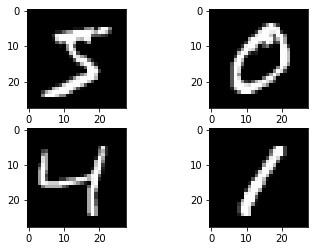

In [4]:
# plot 4 images as gray scale 
plt.subplot(221) 
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(222) 
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(223) 
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' )) 
plt.subplot(224) 
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))
# show the plot 
plt.show() 

# 19.4 Simple Convolutional Neural Network for MNIST**

Now that we have seen how to load the MNIST dataset and train a simple Multilayer Perceptron model on it, it is time to develop a more sophisticated convolutional neural network or CNN model. Keras does provide a lot of capability for creating convolutional neural networks. In this section we will create a simple CNN for MNIST that demonstrates how to use all of the aspects of a modern CNN implementation, including Convolutional layers, Pooling layers and Dropout layers. The ﬁrst step is to import the classes and functions needed.

In [5]:
# fix random seed for reproducibility 
seed = 7 
np.random.seed(seed)

Next we need to reshape the MNIST dataset so that it is suitable for use training a CNN. In Keras, the layers used for two-dimensional convolutions expect pixel values with the dimensions [channels][width][height]. In the case of RGB, the ﬁrst dimension channels would be 3 for the red, green and blue components and it would be like having 3 image inputs for every color image. In the case of MNIST where the channels values are gray scale, the pixel dimension is set to 1.


In [6]:
# reshape to be [samples][channels][width][height] 
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( 'float32' ) 
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( 'float32' )

In [7]:
X_train.shape, y_train.shape ,X_test.shape, y_test.shape

((60000, 1, 28, 28), (60000,), (10000, 1, 28, 28), (10000,))

As before, it is a good idea to normalize the pixel values to the range 0 and 1 and one hot encode the output variable.

In [8]:
X_train[0][0][20]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  24.,
       114., 221., 253., 253., 253., 253., 201.,  78.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.], dtype=float32)

In [9]:
y_train[0]

5

In [10]:
# normalize inputs from 0-255 to 0-1 
X_train = X_train / 255
X_test = X_test / 255 
# one hot encode outputs 
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test) 
num_classes = y_test.shape[1]

In [11]:
X_train[0][0][20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09411765, 0.44705883, 0.8666667 , 0.99215686, 0.99215686,
       0.99215686, 0.99215686, 0.7882353 , 0.30588236, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [12]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Creating the Larger CNN model

Next we deﬁne our neural network model. Convolutional neural networks are more complex than standard Multilayer Perceptrons, so we will start by using a simple structure to begin with that uses all of the elements for state-of-the-art results. Below summarizes the network architecture.
1. Convolutional layer with 30 feature maps of size 5x5. 
2. Pooling layer taking the max over 2x2 patches. 
3. Convolutional layer with 15 feature maps of size 3x3. 
4. Pooling layer taking the max over 2x2 patches. 
5. Dropout layer with a probability of 20%.
6. Flatten layer.
7. Fully connected layer with 128 neurons and rectiﬁer activation
8. Fully connected layer with 50 neurons and rectiﬁer activation.
9. Output layer.

    Visible -> Convolutional -> Max Pooling -> Convolutional -> Max Pooling -> Dropout ->  Hidden  ->   Hidden ->   Output
    1x28x28     30 maps, 5x5        2x2         15 maps 3x3         2x2           20%    128 neurons  50 neurons  10 outputs


In [13]:
def baseline_model(): 
  # create model 
  model = Sequential() 
  model.add(Convolution2D(32, (5, 5), padding= 'valid' , input_shape=(1, 28, 28), activation= 'relu', data_format = 'channels_first' )) 
  model.add(MaxPooling2D(pool_size=(2, 2))) 
  model.add(Dropout(0.2)) 
  model.add(Flatten()) 
  model.add(Dense(128, activation= 'relu' )) 
  model.add(Dense(num_classes, activation= 'softmax' )) 
  # Compile model 
  model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ]) 
  return model

We evaluate the model the same way as before with the Multilayer Perceptron. The CNN is ﬁt over 10 epochs with a batch size of 200.

In [14]:
# build the model 
model = baseline_model() 
# Fit the model 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 36s - loss: 0.2554 - accuracy: 0.9266 - val_loss: 0.0889 - val_accuracy: 0.9724
Epoch 2/10
 - 36s - loss: 0.0823 - accuracy: 0.9752 - val_loss: 0.0541 - val_accuracy: 0.9823
Epoch 3/10
 - 36s - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0439 - val_accuracy: 0.9854
Epoch 4/10
 - 36s - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0436 - val_accuracy: 0.9866
Epoch 5/10
 - 35s - loss: 0.0346 - accuracy: 0.9891 - val_loss: 0.0377 - val_accuracy: 0.9878
Epoch 6/10
 - 36s - loss: 0.0274 - accuracy: 0.9916 - val_loss: 0.0333 - val_accuracy: 0.9895
Epoch 7/10
 - 36s - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.0361 - val_accuracy: 0.9883
Epoch 8/10
 - 35s - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.0335 - val_accuracy: 0.9895
Epoch 9/10
 - 35s - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0339 - val_accuracy: 0.9895
Epoch 10/10
 - 35s - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0324 - val_accuracy: 0.9893


Running the example, the accuracy on the training and validation test is printed each epoch and at the end of the classiﬁcation error rate is printed. Epochs may take 60 seconds to run on the CPU, or about 10 minutes in total depending on your hardware. You can see that the network achieves an error rate of 1.10, which is better than our simple Multilayer Perceptron model above

In [18]:
# Final evaluation of the model 
scores = model.evaluate(X_test, y_test, verbose=2)
scores

[0.03244279860862589, 0.989300012588501]